In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')

In [2]:
## Data Preparation 
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


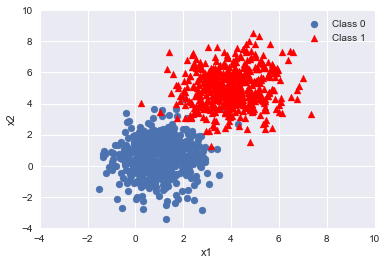

In [3]:
## Plotting data
plt.figure(0)
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-4,10)
plt.ylim(-4,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [4]:
## Splitting Data in Training and Testing Data Set 
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [5]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [6]:
np.random.shuffle(data)
print(data[:10])

[[ 6.01280304  3.89527827  1.        ]
 [ 0.92463842  1.3196143   0.        ]
 [-0.39218375  0.93526319  0.        ]
 [ 4.06439045  6.53920829  1.        ]
 [ 1.75406355  3.18602385  0.        ]
 [ 3.05473992  7.65867462  1.        ]
 [ 5.23803694  4.54895649  1.        ]
 [-0.18236026 -0.50249563  0.        ]
 [ 0.1842224   1.93170701  0.        ]
 [ 3.11227415  3.57341531  1.        ]]


In [7]:


split = int(0.8*data.shape[0])

In [22]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


In [23]:
## Logistic Regression Functions
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    hx = np.dot(x,w)+b
    return sigmoid(hx)

In [24]:
def sigmoid(h):
    return 1.0/(1.0 + np.exp(-1.0*h))

In [25]:
def error(y,x,w,b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err += y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return err/m

In [12]:
def get_grad(x,w,b,y):
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        grad_w += (y[i] - hx)*x[i]
        grad_b +=  (y[i]-hx)
    
    grad_w /=m
    grad_b /=m
    return [grad_w,grad_b]

In [13]:
def gradient_descent(x,y,w,b,learning_rate=0.01):
    err = error(y,x,w,b)
    [grad_w,grad_b] = get_grad(x,w,b,y)
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    return err,w,b

In [14]:
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

In [15]:
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [16]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [17]:
for i in range(1000):
    l,W,b = gradient_descent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

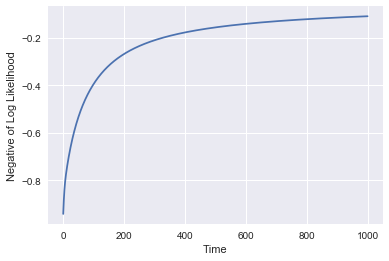

In [18]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

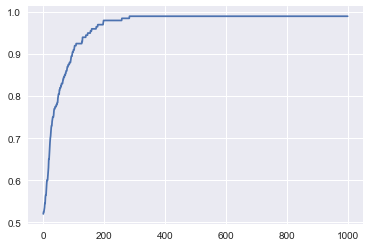

0.99


In [19]:
plt.plot(acc)
plt.show()
print(acc[-1])

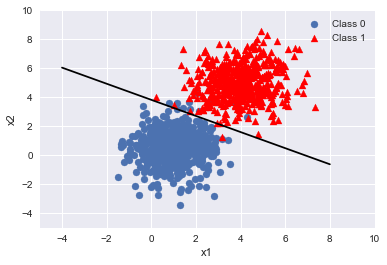

In [20]:
## Plotting a Hyperplane or a decision boundary 
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()

In [21]:
print(W)
print(b)

[0.69543697 1.25157605]
-4.790223966655936


## Logistic Assignment

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')
from mpl_toolkits import mplot3d

In [27]:
X_train = pd.read_csv("./Logistic_X_Train.csv")
Y_train = pd.read_csv("./Logistic_Y_Train.csv")

In [30]:

f1 = X_train[['f1']].values
f2 = X_train[['f2']].values
f3 = X_train[['f3']].values
x = f1
x = np.hstack((f1,f2))
x = np.hstack((x,f3))
print(x.shape)
f1 = f1.reshape((-1,))
f2 = f2.reshape((-1,))
f3 = f3.reshape((-1,))

y = Y_train[['label']].values
y = y.reshape((-1))

(3000, 3)


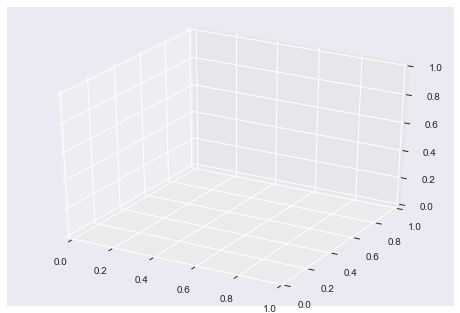

In [31]:
fig = plt.figure()
ax = plt.axes(projection="3d")

plt.show()

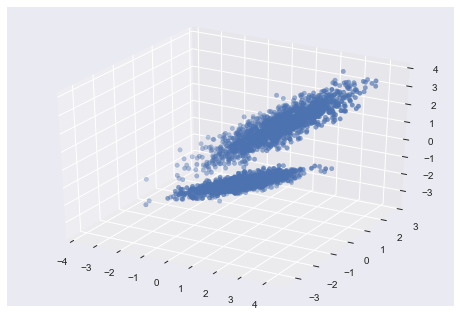

In [32]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(f2,f3,f1,  cmap='hsv')
plt.show()

In [33]:
def hypothesis(x,w,b):
    hx = np.dot(x,w)+b
    return sigmoid(hx)

In [34]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-1.0*x))

In [35]:
def error(x,y,w,b):
    err = 0.0
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err+=(y[i]*np.log2(hx) + (1-y[i])*np.log2(1-hx))
    return err/m

In [36]:
def gradient(x,y,w,b):
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        grad_b+=(y[i]-hx)
        grad_w+=((y[i]-hx)*x[i])
    grad_b/=m
    grad_w/=m
    return [grad_w,grad_b]

In [37]:
def gradient_descent(x,y,w,b,learning_rate = 0.01):
    err = error(x,y,w,b)
    [grad_w,grad_b] = gradient(x,y,w,b)
    w += learning_rate*grad_w
    b += learning_rate*grad_b
    return err,w,b

In [38]:
def predict(x,w,b):
    confidence = hypothesis(x,w,b)
    if(confidence > 0.5):
        return 1
    else:
        return 0

In [39]:
def get_acc(x_test,y_test,w,b):
    pred = []
    m = y_test.shape[0]
    for i in range(m):
        p = predict(x_test[i],w,b)
        pred.append(p)
    
    pred = np.array(pred)
    
    return float(((pred == y_test).sum())/m)

In [45]:
loss = []
acc = []

W = np.zeros((x.shape[1],))
b = 0
#W.shape

In [46]:
for i in range(10000):
    l,W,b = gradient_descent(x,y,W,b,learning_rate = 0.1)
    loss.append(l)
    #acc.append(gte_acc())

KeyboardInterrupt: 

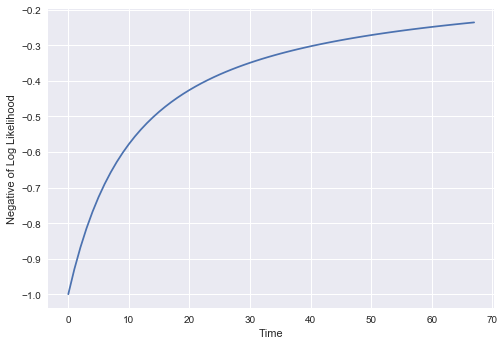

In [47]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

In [48]:
X_test = pd.read_csv("./Logistic_X_Test.csv")

In [49]:
f1_test = X_test[['f1']].values
f2_test = X_test[['f2']].values
f3_test = X_test[['f3']].values

f1_test = f1_test.reshape((-1,))
f2_test = f2_test.reshape((-1,))
f3_test = f3_test.reshape((-1,))

In [50]:
f1

array([-1.23937466, -1.03607028, -0.61557914, ...,  0.08827657,
        1.52515501, -0.97981744])

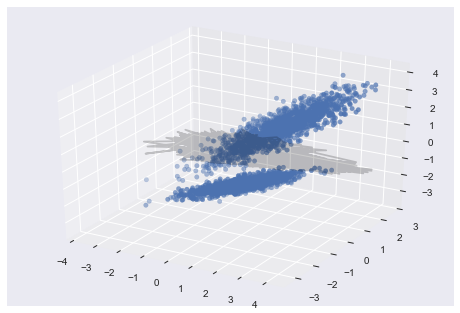

In [51]:
#Trainging Data

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(f2,f3,f1,  cmap='hsv')
#plt.show()

xt = f2
yt = f3
zt = -((W[1]*xt + W[2]*yt + b)/W[0])

ax.plot3D(xt,yt,zt,color = 'k',alpha = 0.2)
plt.show()

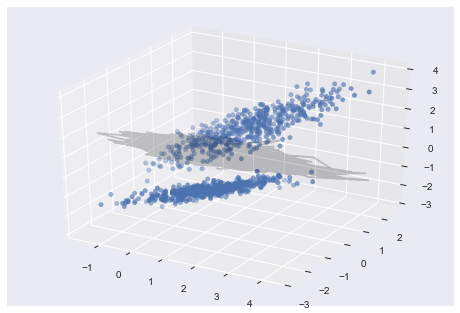

In [52]:
#Testing Data

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(f2_test,f3_test,f1_test,  cmap='hsv')
#plt.show()

xt = f2_test
yt = f3_test
zt = (-(W[1]*xt + W[2]*yt + b)/W[0])

ax.plot3D(xt,yt,zt,color = 'k',alpha = 0.2)
plt.show()